In [1]:
import pandas as pd
df = pd.read_excel("nyc_trip_dataset.xlsx")

In [2]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,2017-11-04 14:53:00,2017-11-04 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,2017-07-05 13:17:00,2017-07-05 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,2017-06-08 16:43:00,2017-06-08 17:24:00,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,2017-04-09 14:54:00,2017-04-09 14:58:00,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
# converted pickup and dropoff columns to datetime data type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in seconds
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-11-04 14:53:00,2017-11-04 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.000000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-07-05 13:17:00,2017-07-05 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,31.000000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-06-08 16:43:00,2017-06-08 17:24:00,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,41.000000
22696,74239933,2,2017-04-09 14:54:00,2017-04-09 14:58:00,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.000000
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [5]:
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-11-04 14:53:00,2017-11-04 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.000000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-07-05 13:17:00,2017-07-05 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,31.000000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-06-08 16:43:00,2017-06-08 17:24:00,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,41.000000
22696,74239933,2,2017-04-09 14:54:00,2017-04-09 14:58:00,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.000000
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [6]:
# i want only the few columns
working_df = df[['passenger_count','payment_type','trip_distance','trip_duration_minutes','fare_amount']]

working_df.isnull().sum() # if it is null, it wil return as True otherwise False, and sum function will add all the true values together


passenger_count          0
payment_type             0
trip_distance            0
trip_duration_minutes    0
fare_amount              0
dtype: int64

In [7]:
working_df = working_df.drop_duplicates()
working_df


,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0
22695,1,1,16.71,41.000000,52.0


In [8]:
working_df.describe()

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
count,20543.000000,20543.000000,20543.000000,20543.000000,20543.000000
mean,1.701748,1.344546,3.094635,85.752519,13.632793
std,1.330857,0.500380,3.788226,7607.913075,13.744220
min,0.000000,1.000000,0.000000,-465074.766667,-120.000000
25%,1.000000,1.000000,1.000000,7.000000,7.000000
50%,1.000000,1.000000,1.740000,12.000000,10.000000
75%,2.000000,2.000000,3.300000,19.433333,15.500000
max,6.000000,4.000000,33.960000,44640.000000,999.990000


In [9]:
working_df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.685246
2    0.156160
5    0.055250
3    0.046098
6    0.033539
4    0.022100
0    0.001606
Name: proportion, dtype: float64

In [10]:
working_df = working_df[working_df['passenger_count']>0] # as there can't be 0 passengers

In [11]:
working_df

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0
22695,1,1,16.71,41.000000,52.0


In [12]:
working_df['payment_type'].value_counts(normalize = True)

payment_type
1    0.665285
2    0.326816
3    0.005705
4    0.002194
Name: proportion, dtype: float64

In [13]:
working_df = working_df[working_df['payment_type']<3]

In [14]:
working_df

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0
22695,1,1,16.71,41.000000,52.0


In [15]:
working_df.describe()

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
count,20348.000000,20348.000000,20348.000000,20348.000000,20348.000000
mean,1.707637,1.329418,3.094677,86.384549,13.646513
std,1.333247,0.470013,3.780322,7644.273222,13.704450
min,1.000000,1.000000,0.000000,-465074.766667,0.000000
25%,1.000000,1.000000,1.010000,7.000000,7.000000
50%,1.000000,1.000000,1.740000,12.000000,10.000000
75%,2.000000,2.000000,3.300000,19.437500,15.500000
max,6.000000,2.000000,33.960000,44640.000000,999.990000


In [16]:
working_df = working_df[working_df['trip_duration_minutes']>0]

In [17]:
working_df

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0
22695,1,1,16.71,41.000000,52.0


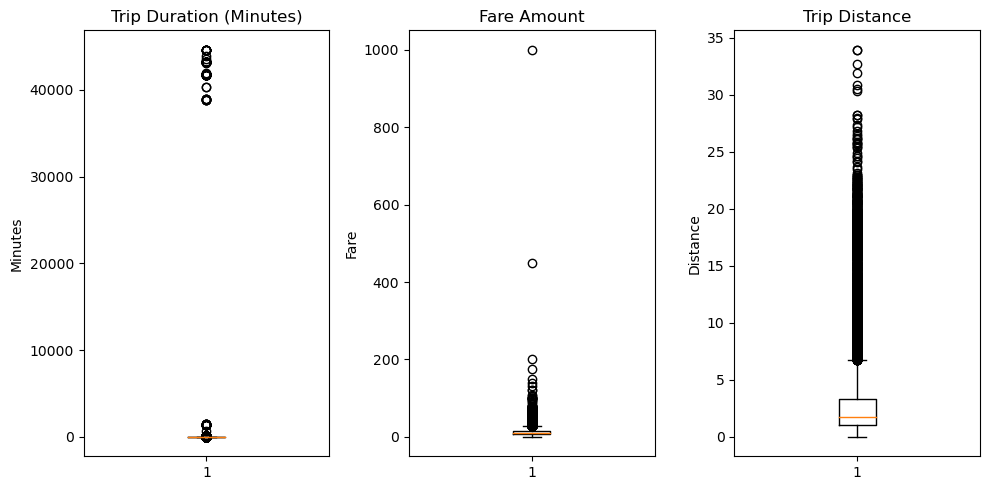

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# checking outliers in trip_duration_minutes column
import matplotlib.pyplot as plt
%matplotlib inline

# Checking outliers for trip duration
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
plt.boxplot(working_df.trip_duration_minutes)
plt.title('Trip Duration (Minutes)')
plt.ylabel('Minutes')

# Checking outliers for fare amount
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
plt.boxplot(working_df.fare_amount)
plt.title('Fare Amount')
plt.ylabel('Fare')

# Checking outliers for trip distance
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
plt.boxplot(working_df.trip_distance)
plt.title('Trip Distance')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [19]:
# getting rid of outliers
for col in [ 'trip_duration_minutes','trip_distance','fare_amount']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
# filtering the outliers
    working_df = working_df[(working_df[col]>=lower_bound)& (working_df[col]<=upper_bound)]


In [20]:
working_df

,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22691,1,1,2.12,6.000000,8.0
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0


In [21]:
working_df['payment_type'].replace({1: "Card", 2: "Cash"}, inplace = True)


In [ ]:
# Exploratory Data Analysis

In [ ]:
# Creating Histograms: For continuous variables like fare amount, trip distance, trip duration


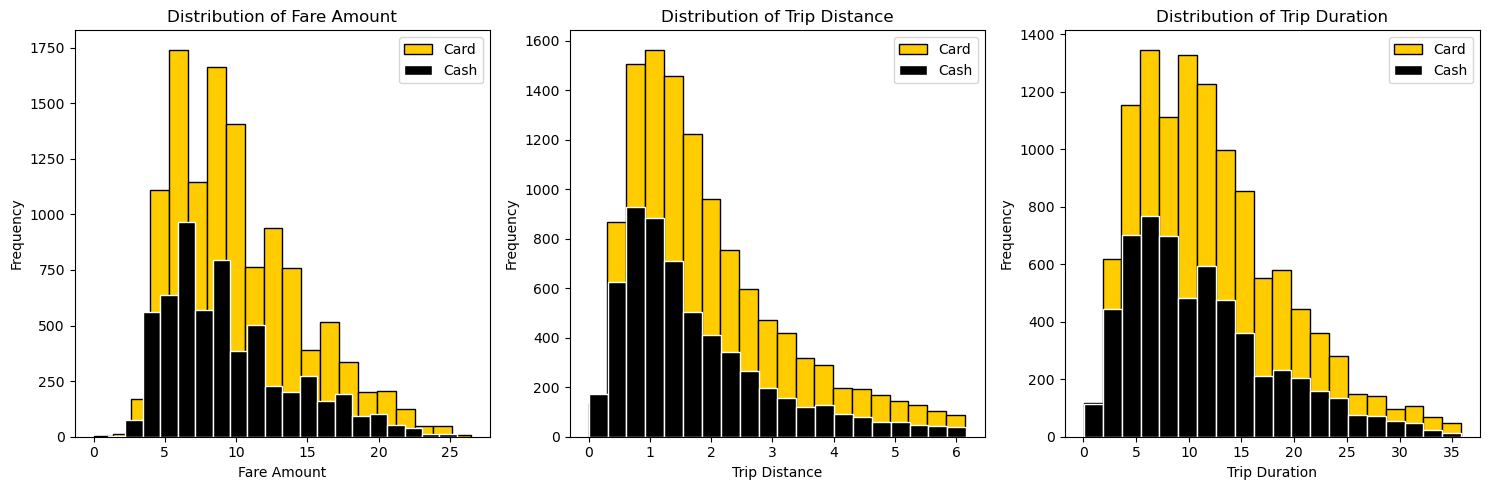

In [22]:
import matplotlib.pyplot as plt

# Mustard yellow and black colors
mustard_yellow = "#FFCC00"
black = "#000000"

plt.figure(figsize=(15, 5))  # Adjust figure size as needed

# Distribution of fare amount
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
plt.title("Distribution of Fare Amount")
plt.hist(working_df[working_df['payment_type'] == 'Card']['fare_amount'],
         bins=20, edgecolor='black', color=mustard_yellow, label='Card') 
plt.hist(working_df[working_df['payment_type'] == 'Cash']['fare_amount'],
         bins=20, edgecolor='white', color=black, label='Cash')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()

# Distribution of trip distance
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
plt.title("Distribution of Trip Distance")
plt.hist(working_df[working_df['payment_type'] == 'Card']['trip_distance'],
         bins=20, edgecolor='black', color=mustard_yellow, label='Card')
plt.hist(working_df[working_df['payment_type'] == 'Cash']['trip_distance'],
         bins=20, edgecolor='white', color=black, label='Cash')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()

# Distribution of trip duration
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
plt.title("Distribution of Trip Duration")
plt.hist(working_df[working_df['payment_type'] == 'Card']['trip_duration_minutes'],
         bins=20, edgecolor='black', color=mustard_yellow, label='Card')
plt.hist(working_df[working_df['payment_type'] == 'Cash']['trip_duration_minutes'],
         bins=20, edgecolor='white', color=black, label='Cash')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()  # Ensures subplots are neatly arranged
plt.show()


In [23]:
# Descriptive statistics
# Calculating mean, standard deviation
working_df.groupby('payment_type')[['fare_amount', 'trip_distance', 'trip_duration_minutes']].agg(['mean', 'std']) # this calculcation supports the above histograms


fare_amount           trip_distance            \
                    mean       std          mean       std   
payment_type                                                 
Card           10.133212  4.489577      1.947427  1.266486   
Cash            9.470398  4.466325      1.744180  1.241439   

             trip_duration_minutes            
                              mean       std  
payment_type                                  
Card                     12.122304  6.920931  
Cash                     11.271174  6.946643

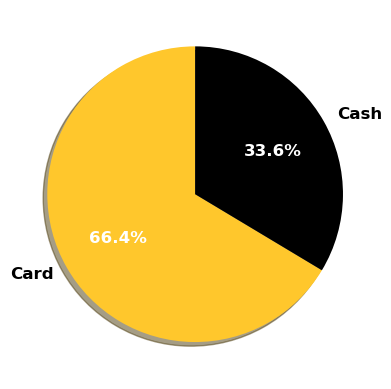

In [24]:
#Pie Charts: For categorical variables like payment type, to see the distribution of categories.
import matplotlib.pyplot as plt

payment_type_counts = working_df['payment_type'].value_counts(normalize=True)
payment_type_labels = working_df['payment_type'].value_counts().index


nyc_yellow = '#FFC72C'
black = '#000000'

# Create the pie chart with NYC yellow and black colors
wedges, texts, autotexts = plt.pie(
    payment_type_counts, 
    labels=payment_type_labels, 
    startangle=90,       # Start the first slice at the top of the chart
    shadow=True,         # Add a shadow for a 3D effect
    autopct='%1.1f%%',   # Display percentage values on the pie chart 
    colors=[nyc_yellow, black],  # NYC yellow and black colors
   
)


# Set the properties of the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)  # Set font size
    autotext.set_fontweight('bold')  # Set font weight to bold


for text in texts:
    text.set_fontsize(12)  # Set font size
    text.set_fontweight('bold')  # Set font weight to bold


# Display the chart
plt.show()


In [27]:
# Next step, I want to analyse passenger count, basically i want to analyse number of trips by payment type and passenger count.
passenger_count = working_df.groupby(['passenger_count', 'payment_type'])[['passenger_count']].count() # Here, the passenger_count column represents the number of trips for each combination of payment_type and passenger_count. .
passenger_count

passenger_count = passenger_count.rename(columns = {'passenger_count':'count'})
passenger_count = passenger_count.reset_index()
passenger_count

,passenger_count,payment_type,count
0,1,Card,8015
1,1,Cash,3942
2,2,Card,1767
3,2,Cash,947
4,3,Card,517
5,3,Cash,297
6,4,Card,232
7,4,Cash,151
8,5,Card,667
9,5,Cash,314


In [28]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count['perc']

0     45.947030
1     22.598028
2     10.129557
3      5.428801
4      2.963770
5      1.702591
6      1.329970
7      0.865627
8      3.823664
9      1.800046
10     2.207063
11     1.203852
Name: perc, dtype: float64

In [29]:
passenger_count = passenger_count[['payment_type', 'passenger_count', 'perc']]
passenger_count

,payment_type,passenger_count,perc
0,Card,1,45.947030
1,Cash,1,22.598028
2,Card,2,10.129557
3,Cash,2,5.428801
4,Card,3,2.963770
5,Cash,3,1.702591
6,Card,4,1.329970
7,Cash,4,0.865627
8,Card,5,3.823664
9,Cash,5,1.800046


In [30]:
df = passenger_count.pivot(index ='payment_type', columns = 'passenger_count', values = 'perc')
df

passenger_count,1,2,3,4,5,6
payment_type,,,,,,
Card,45.947030,10.129557,2.963770,1.329970,3.823664,2.207063
Cash,22.598028,5.428801,1.702591,0.865627,1.800046,1.203852


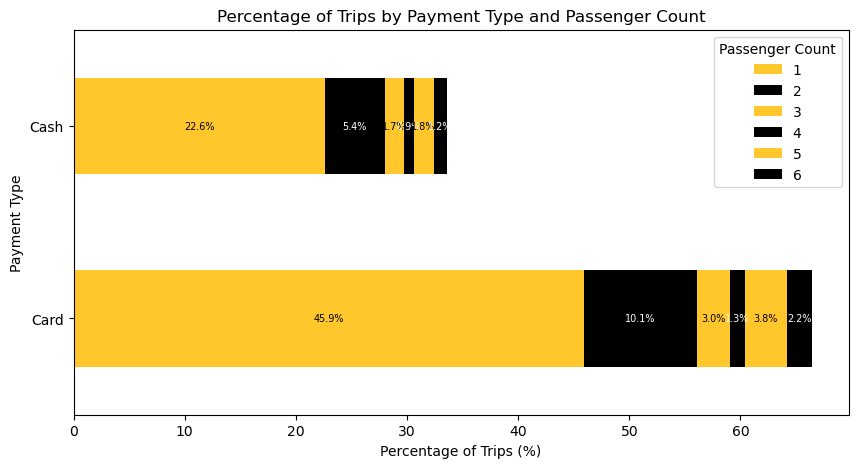

In [31]:
df = passenger_count.pivot(index='payment_type', columns='passenger_count', values='perc')

# Define colors: Mustard yellow (NYC Yellow Cab) and black
colors = ['#FFC72C', '#000000', '#FFC72C', '#000000', '#FFC72C', '#000000']

# Plotting the stacked bar chart
ax = df.plot(kind='barh', stacked=True, color=colors, figsize=(10, 5))  # barh means bar horizontal

# Add percentage text
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # Gets the width of the current bar
        height = bar.get_height()  # Gets the height of the current bar
        x = bar.get_x() + width / 2  # Calculate the x-coordinate for placing text at the center of the bar
        y = bar.get_y() + height / 2  # Calculate the y-coordinate for placing text at the center of the bar
        if width > 0:  # Conditional Annotation: Check if the width of the bar is positive (to avoid labels on empty bars)
            ax.annotate(f'{width:.1f}%', 
                        xy=(x, y),
                        ha='center', va='center', color='white' if bar.get_facecolor()[:3] == (0, 0, 0) else 'black', fontsize=7)#Sets the text color to white if the bar's facecolor is black (RGB values (0, 0, 0)), otherwise sets it to black.
            # Adjust the text color to be white if the bar color is black for better visibility

# Customizing the plot
plt.xlabel('Percentage of Trips (%)')
plt.ylabel('Payment Type')
plt.title('Percentage of Trips by Payment Type and Passenger Count')
plt.legend(title='Passenger Count')

# Display the plot
plt.show()


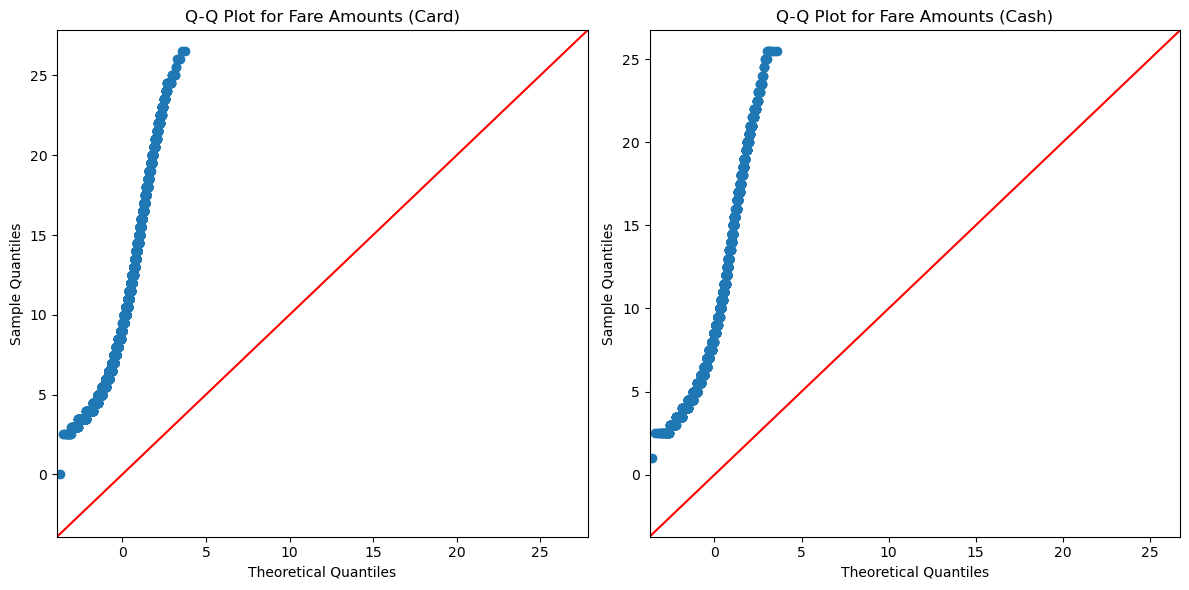

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Filter the data by payment type
fare_card = working_df[working_df['payment_type'] == 'Card']['fare_amount']
fare_cash = working_df[working_df['payment_type'] == 'Cash']['fare_amount']

plt.figure(figsize=(12,6))

# Q-Q plot for fare amounts paid by card
plt.subplot(1,2,1)
sm.qqplot(fare_card, line='45', ax=plt.gca()) # gca stands for get current axis, When creating multiple subplots, one needs to ensure that each plot is directed to the correct subplot. By default, the plotting functions will use the currently active subplot, but specifying ax=plt.gca() ensures that the plot is added to the current axis, which is useful when working with subplots.
# So, by adding ax=plt.gca(),I am explicitly telling the Q-Q plot function to draw the plot in the currently active subplot area.
plt.title('Q-Q Plot for Fare Amounts (Card)')

# Q-Q plot for fare amounts paid by cash
plt.subplot(1,2,2)
sm.qqplot(fare_cash, line='45', ax=plt.gca())
plt.title('Q-Q Plot for Fare Amounts (Cash)')

plt.tight_layout()
plt.show()


# To hypothesis testing, 
If the data in each group is normally distributed, we could use Z test or t test
if the data is normally distributed I need to use, Mann Whitney U test

In [33]:

# Hypothesis testing
# Null Hypothesis(H0): There is no difference in average fare between customers who use credit cards and cash.
# Alternate Hypothesis(H1): There is a difference in average fare between customers who use credit cards and cash.

from scipy.stats import mannwhitneyu

# Extract fare amounts for each payment type
card_fares = working_df[working_df['payment_type'] == 'Card']['fare_amount']
cash_fares = working_df[working_df['payment_type'] == 'Cash']['fare_amount']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(card_fares, cash_fares)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Fail to reject the null hypothesis (same distribution)')
else:
    print('Reject the null hypothesis (different distribution)')


Statistics=37219757.000, p=0.000
Reject the null hypothesis (different distribution)


 Regression Analysis
 Why? Regression Aanlyis:
 
After conducting initial descriptive statistics such as mean calculations and visualizations like histograms and pie charts to analyze preferences between card and cash payments, it became evident that payment method significantly influences fare amounts. However, fare amounts are influenced by multiple factors beyond just payment type, such as trip distance, trip duration, and passenger counts. Therefore, conducting regression analysis allows for a comprehensive assessment of how these various factors collectively impact fare amounts."


In [214]:
# Since payment_type column currently is object type, converting it back to the numerical values for regression analysis. As regression Analysis works only on numerical values
working_df['payment_type'].replace({"Card": 1, "Cash": 2}, inplace = True)
working_df


,passenger_count,payment_type,trip_distance,trip_duration_minutes,fare_amount
0,6,1,3.34,14.066667,13.0
1,1,1,1.80,26.000000,16.0
2,1,1,1.00,7.200000,6.5
3,1,1,3.70,31.000000,20.5
4,1,2,4.37,16.716667,16.5
...,...,...,...,...,...
22691,1,1,2.12,6.000000,8.0
22692,1,1,5.70,18.016667,19.0
22693,1,1,0.89,9.000000,7.5
22694,3,2,0.61,3.266667,4.0


In [215]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17444 entries, 0 to 22697
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_count        17444 non-null  int64  
 1   payment_type           17444 non-null  int64  
 2   trip_distance          17444 non-null  float64
 3   trip_duration_minutes  17444 non-null  float64
 4   fare_amount            17444 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 817.7 KB


In [220]:
# Regression analysis

import pandas as pd
import statsmodels.api as sm

categorical_cols = ['payment_type'] #The reason for considering payment_type as a categorical variable is that it represents distinct categories or groups (e.g., "Card" and "Cash"), rather than a continuous numerical scale. In regression analysis, categorical variables need special handling to properly capture their effect.
dummy_vars = pd.get_dummies(working_df[categorical_cols], drop_first=True) #The reason I converted the payment type to a dummy variable is to properly analyze its impact on fare amount. If I included the payment_type variable directly in the regression model without creating dummy variables and dropping the first category, the model would treat the payment_type variable as numerical (with values 1 and 2). This approach would not correctly capture the categorical nature of the variable. Therefore, I created dummy variables and dropped one of the categories to avoid multicollinearity.


# Concatenate dummy variables with other independent variables
X = pd.concat([working_df[['trip_distance', 'trip_duration_minutes', 'passenger_count']], dummy_vars], axis=1)

y = working_df['fare_amount']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.391e+05
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:09:09   Log-Likelihood:                -15875.
No. Observations:               17444   AIC:                         3.176e+04
Df Residuals:                   17439   BIC:                         3.180e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.15


Recommendations

Focus on Overall Trip Characteristics:

Improve Efficiency: Since trip_distance and trip_duration_minutes are significant predictors of fare amount, taxi services should focus on improving the efficiency of trips. This can be done by optimizing routes and reducing wait times.
Target Longer Trips: Encourage customers to use taxis for longer trips, as trip_distance has a strong positive impact on fare amount.
Payment Convenience:

Promote Both Payment Methods Equally: Since there is no significant difference in fare amounts between cash and card payments, focus on providing a seamless payment experience for both methods. Ensure that customers have the flexibility to choose their preferred payment method.
Maintain Payment Flexibility: Continue accepting both cash and card payments to cater to a broader customer base. Some customers may prefer cash due to convenience or lack of access to credit cards, while others may prefer card payments for tracking expenses.
Enhance Customer Experience:

Improve Service Quality: Focus on factors that enhance the overall customer experience, such as driver professionalism, vehicle cleanliness, and safety. These factors can indirectly influence customer satisfaction and encourage repeat business.
Loyalty Programs: Implement loyalty programs that reward frequent customers, regardless of their payment method. This can increase customer retention and promote higher revenue.
Operational Improvements:

Driver Training: Provide training to drivers on customer service, route optimization, and handling different payment methods efficiently.
Technology Integration: Use technology to streamline operations, such as real-time tracking, automated fare calculation, and easy payment processing.
Marketing and Promotions:

Promote High-Fare Services: Market services that typically generate higher fares, such as airport transfers, long-distance trips, or premium services.
Special Offers: Offer promotions and discounts that are not tied to the payment method but rather to trip characteristics, such as discounts for round trips or peak-hour rides.
Conclusion
The regression results indicate that focusing solely on promoting card payments may not significantly impact revenue. Instead, a more comprehensive approach that emphasizes overall trip efficiency, customer experience, and operational improvements will likely be more effective in increasing revenue and customer satisfaction. By leveraging these strategies, taxi services can enhance their competitive edge and foster customer loyalty.


2